In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from trunk_sim.visualization import visualize_trajectory_from_data, visualize_velocities_from_data, visualize_inputs_from_data
import stats

import numpy as np

In [2]:
# load from csv
df = pd.read_csv('../data/mass_100g_harmonic/test/1/raw/data.csv')
df

,t,x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,...,z29_new,vx29_new,vy29_new,vz29_new,x30_new,y30_new,z30_new,vx30_new,vy30_new,vz30_new
0,0.00,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.309332,0.024310,-0.027543,0.000129,0.000262,-0.000313,-0.319999,0.026151,-0.031309,0.000137
1,0.01,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.309315,0.080664,-0.102024,0.001708,0.001126,-0.001443,-0.319980,0.086463,-0.113036,0.001830
2,0.02,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.309259,0.125828,-0.179543,0.005626,0.002472,-0.003397,-0.319920,0.134558,-0.195383,0.006062
3,0.03,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.309142,0.158833,-0.252667,0.011659,0.004168,-0.006117,-0.319794,0.169587,-0.271982,0.012609
4,0.04,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.308947,0.179379,-0.317084,0.019516,0.006081,-0.009507,-0.319582,0.191328,-0.339011,0.021142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,4.96,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.289613,-0.505693,-0.879818,0.007318,0.084302,-0.055964,-0.299186,-0.534229,-0.928679,0.008491
497,4.97,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.289380,-0.563027,-0.837491,0.023324,0.078355,-0.064803,-0.298927,-0.594636,-0.883924,0.025897
498,4.98,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.288996,-0.615788,-0.789222,0.038444,0.071854,-0.073132,-0.298504,-0.650183,-0.832876,0.042340
499,4.99,0.0,0.0,-0.010667,0.0,0.0,0.0,0.0,0.0,-0.021333,...,-0.288472,-0.663512,-0.735509,0.052332,0.064850,-0.080893,-0.297929,-0.700379,-0.776071,0.057442


In [3]:
df["z1"][0]*1

np.float64(-0.0106666666666666)

In [4]:
df["z30"][0]

np.float64(-0.3199999999999998)

In [5]:
-0.01066666666666666666666666*27

-0.288

In [6]:
# only take the first 1000 samples
df = df[:]

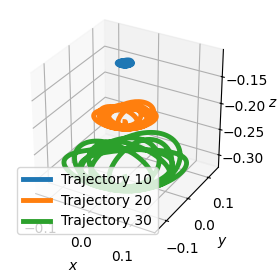

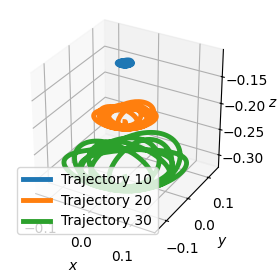

In [7]:
visualize_trajectory_from_data(df, [10, 20, 30])

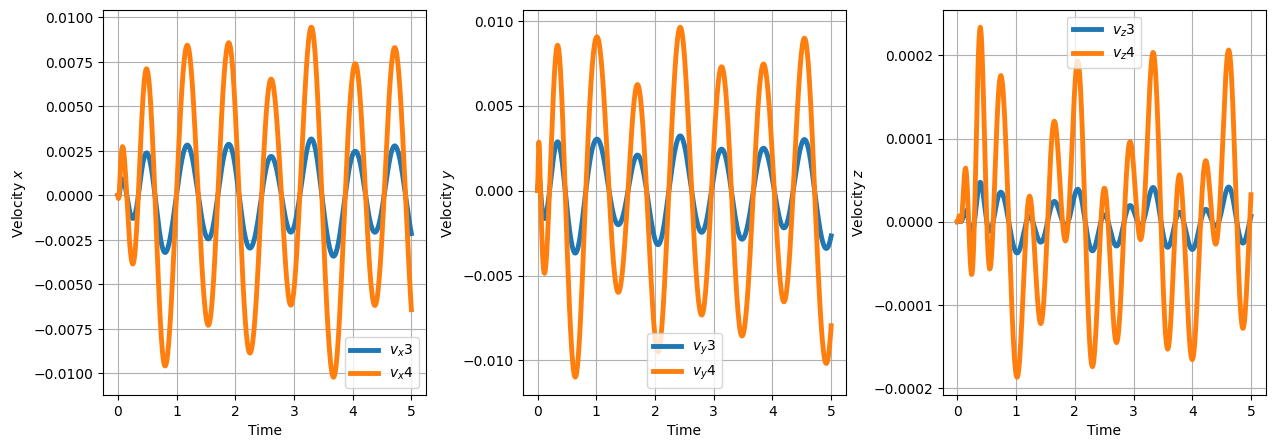

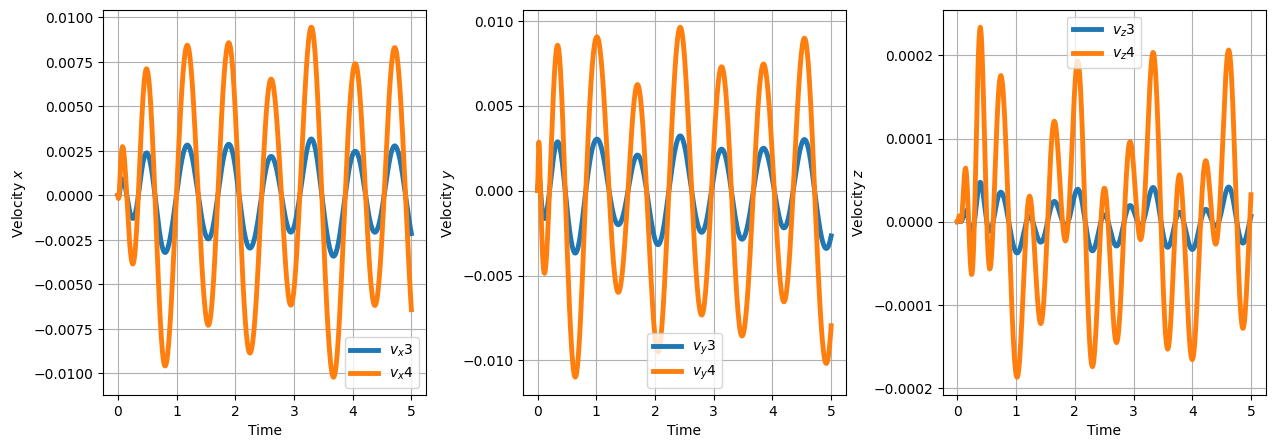

In [8]:
visualize_velocities_from_data(df, [3,4])

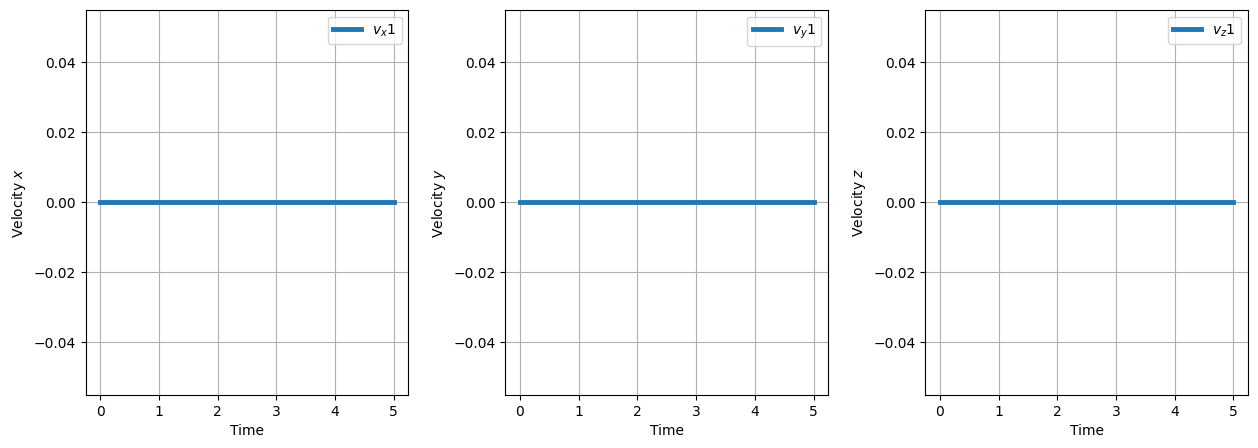

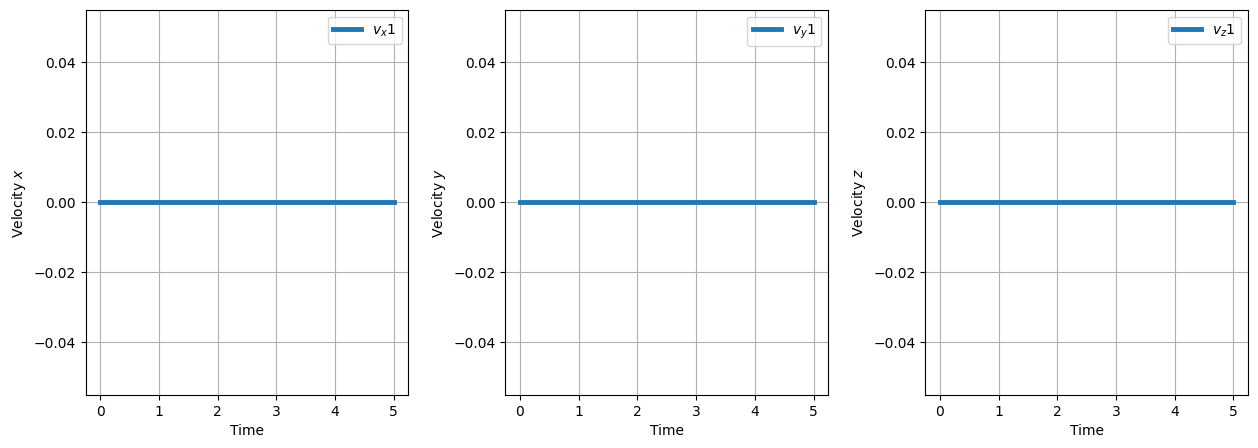

In [9]:
visualize_velocities_from_data(df, [1])

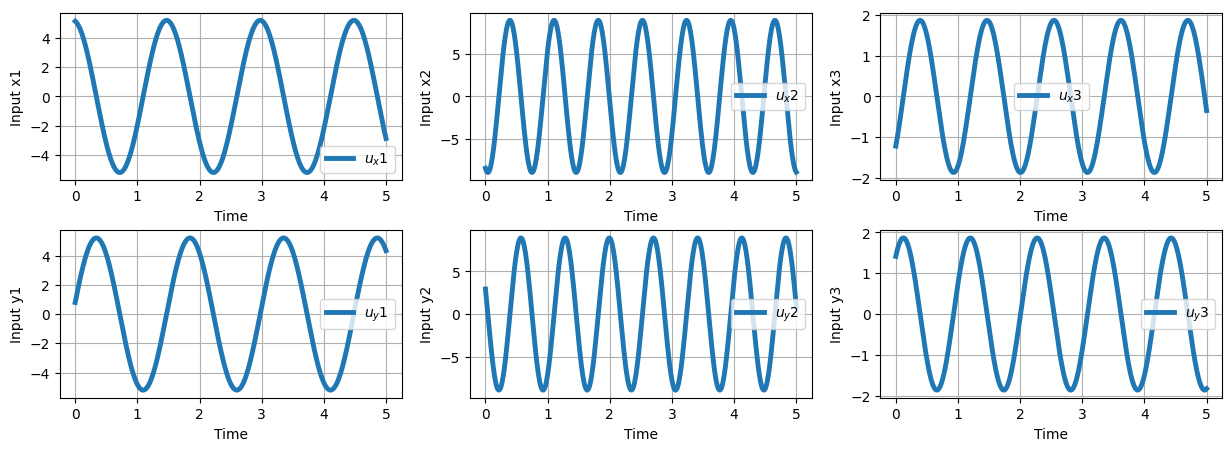

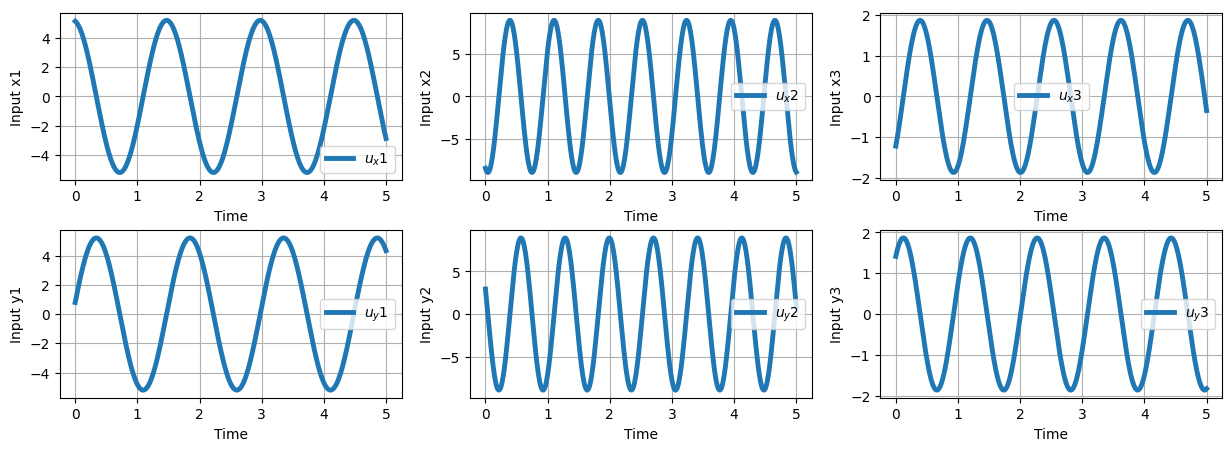

In [26]:
visualize_inputs_from_data(df)

/tmp/ipykernel_28139/1847981425.py:12: RuntimeWarning: invalid value encountered in divide
  diff = X[i,:]/alpha - X30[i,:]


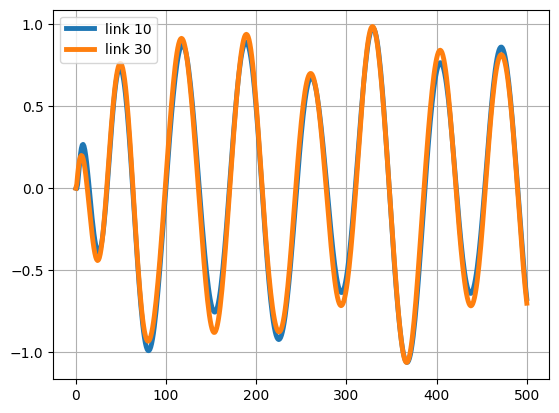

In [27]:
X30 = stats.get_numpy_from_link(df, 30)


diffs = []

for j in range(1,31):
    i = 3
    X = stats.get_numpy_from_link(df, j)
    alpha = np.max(np.abs(X[i,50:])) / np.max(np.abs(X30[i,50:]))


    diff = X[i,:]/alpha - X30[i,:]
    diffs.append(np.linalg.norm(diff)/X.shape[1])

    if j == 10:
        plt.plot(X[i,:]/alpha, label = "link " + str(j))
        plt.plot(X30[i,:], label = "link 30")
        plt.legend()

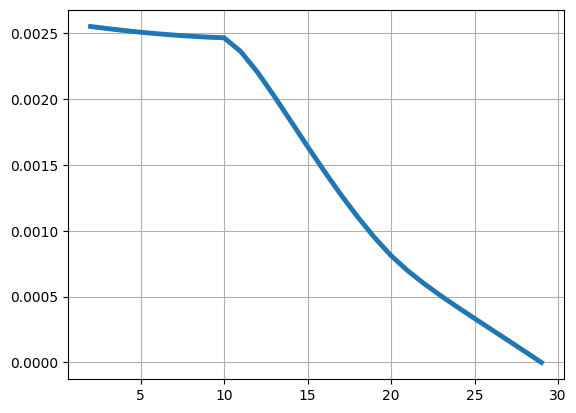

In [11]:
plt.plot(diffs)

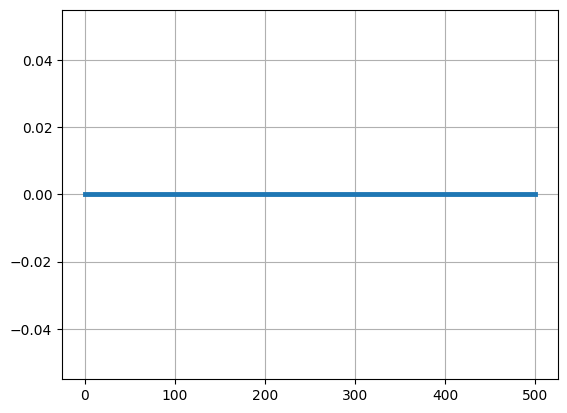

In [12]:
plt.plot(diff)

/tmp/ipykernel_28139/3805001086.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(X[4,:]/X30[4,:])


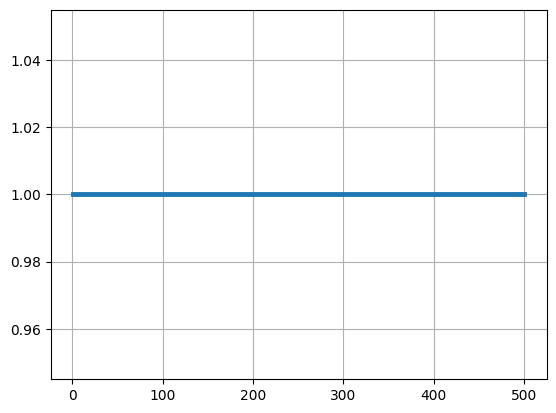

In [13]:
plt.plot(X[4,:]/X30[4,:])

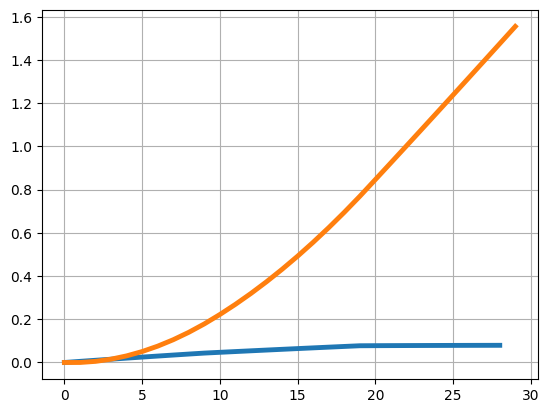

In [14]:
mag = []

for i in range(1,31):
    mag.append(np.linalg.norm(stats.get_numpy_from_link(df, i), axis = 1)[0])

mag = np.array(mag)

plt.plot(mag[1:] - mag[:-1])
plt.plot(mag)

In [15]:
# plot a 2d heatmap of the correlation matrix between nodes 1..30

In [16]:
corr_matrix = np.zeros((30, 30))

for i in range(30):
    for j in range(30):
        X = stats.get_numpy_from_link(df, i + 1)
        # apply circular shift of signal
        Y = np.roll(stats.get_numpy_from_link(df, j + 1),0)
        corr_matrix[i, j] = stats.normalized_cross_correlation(X, Y)

corr_matrix = corr_matrix[:,:]

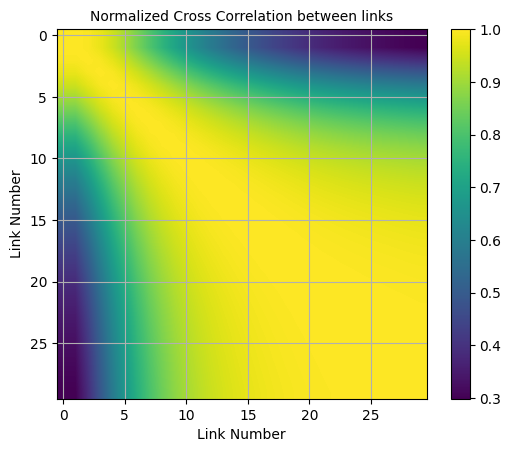

In [17]:
plt.figure()
plt.imshow(corr_matrix, interpolation='bilinear')
plt.xlabel('Link Number')
plt.ylabel('Link Number')

# add colorbar
plt.title('Normalized Cross Correlation between links')
plt.colorbar()

In [18]:
print(np.min(corr_matrix), np.average(corr_matrix), np.max(corr_matrix))

0.2985826486785538 0.8485847675459567 1.0


In [19]:
np.save("corr_matrix",corr_matrix)

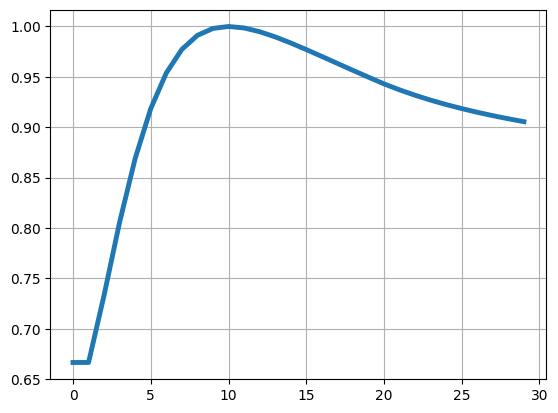

In [20]:
plt.plot(corr_matrix[10,:])

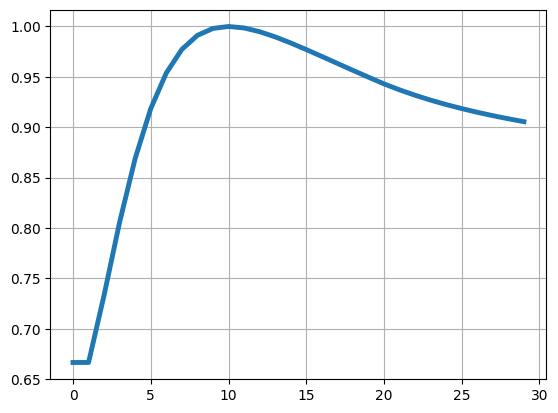

In [21]:
plt.plot(corr_matrix[10,:])

In [22]:
eig, vec = np.linalg.eig(corr_matrix)

(-0.5, 0.5)

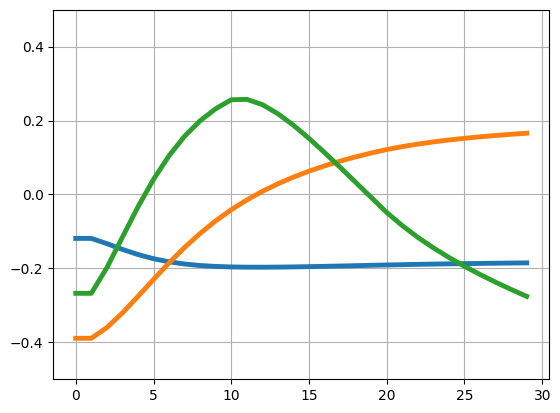

In [23]:
plt.plot(np.real(vec[:,0]))
plt.plot(np.real(vec[:,1]))
plt.plot(np.real(vec[:,2]))
plt.ylim(-0.5,0.5)

# 0-mode nodes up to 5 are contributing much less to this ensemble of signals
# 1-mode tip and base have opposite modes


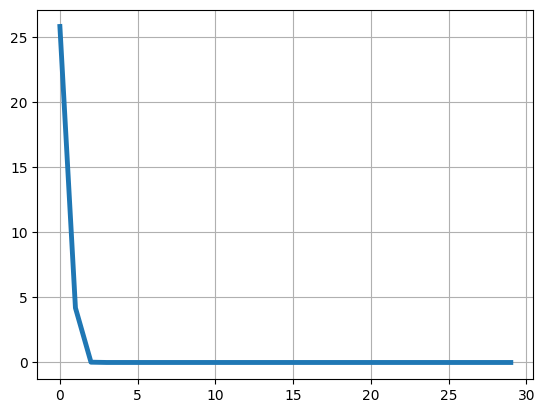

In [24]:
plt.plot(np.real(eig))

In [25]:
import torch

torch.hstack([torch.tensor([[1,2,3]]).T, torch.tensor([[4,5,6]]).T])

tensor([[1, 4],
        [2, 5],
        [3, 6]])